# Exploración de Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
combats = pd.read_csv('combats.csv')
pokedex = pd.read_csv('pokedex_(Update_04.21).csv')
pokemon = pd.read_csv('pokemon.csv')

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
pokemon.loc[pokemon.Name.isna()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


Falta Primeape

lo encontre aca: https://www.pkparaiso.com/pokemon/lista-pokemon.php

In [5]:
pokemon['Name'] = pokemon['Name'].fillna('Primeape')
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [7]:
#pokemon = pokemon.rename(columns = {'Name': 'name'})

In [8]:
#pokemon = pokemon[['#', 'name']]

In [9]:
print(pokedex.shape, pokemon.shape)

(1045, 51) (800, 12)


Hay pokemons que estan en pokedex.csv pero no en pokemon.csv ni en combats.csv

# Un poco de EDA


In [10]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


In [11]:
pokedex.value_counts("type_1")

type_1
Water       134
Normal      115
Grass        91
Psychic      81
Bug          81
Fire         65
Electric     62
Rock         60
Dark         46
Fighting     42
Ghost        42
Ground       41
Dragon       41
Poison       41
Ice          37
Steel        36
Fairy        22
Flying        8
dtype: int64

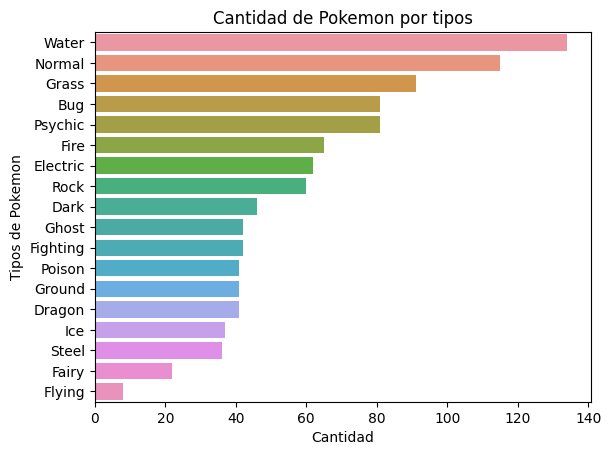

In [12]:
import seaborn as sns

# Distribucion de tipos de pokemon

sns.countplot(y= 'type_1', data= pokedex, order= pokedex['type_1'].value_counts(ascending=False).index )
plt.xlabel("Cantidad")
plt.ylabel("Tipos de Pokemon")
plt.title("Cantidad de Pokemon por tipos")
plt.show()

# Diferenciación entre clases sociales de Pokemon (si son legendarios u otro)


In [13]:
# Vemos la cantidad de legendarios y otros 

pokedex.value_counts("status")

status
Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
dtype: int64

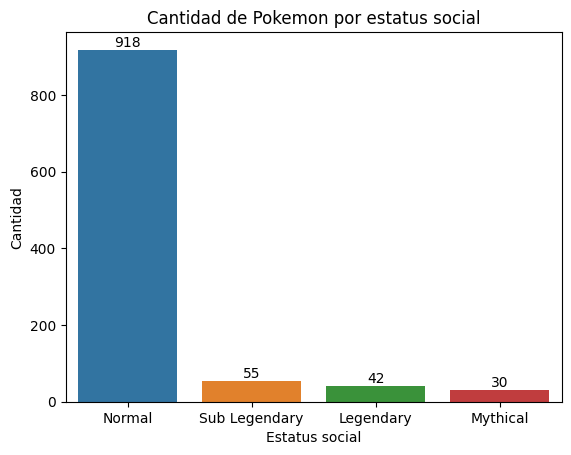

In [14]:
# Graficamos
ax = sns.countplot(x='status',  data=pokedex)

# Ponemos numeritos arriba de c/barrita
for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Cantidad")
plt.xlabel("Estatus social")
plt.title("Cantidad de Pokemon por estatus social")
plt.show()

# Mapa de calor con debilidades de cada tipo


In [15]:
# Voy a tratar de hacer un mapa de calor con las debilidades de cada tipo

# Agarro las columnas que tienen "against" en el nombre
weakness_cols = [col for col in pokedex.columns if "against" in col]

# Chau duplicados
weakness_data = pokedex.drop_duplicates(subset=['type_1'], keep='first')[weakness_cols].values

# Tipos de pokemones que tenemos a una listita
tipos = pokedex["type_1"].unique()

# Creo un DF con las columnas que agarramos antes y los tipos de c/pokemon como indice
poke_weaks = pd.DataFrame(data= weakness_data, index= tipos, columns= weakness_cols)

print(tipos)
poke_weaks

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']


,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
Grass,1.0,2.0,0.5,0.5,0.25,2.00,0.5,1.00,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
Fire,1.0,0.5,2.0,1.0,0.50,0.50,1.0,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
Water,1.0,0.5,0.5,2.0,2.00,0.50,1.0,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
Bug,1.0,2.0,1.0,1.0,0.50,1.00,0.5,1.00,0.5,2.0,1.0,1.00,2.0,1.0,1.0,1.0,1.0,1.0
Normal,1.0,1.0,1.0,2.0,0.50,2.00,1.0,1.00,0.0,1.0,1.0,0.50,2.0,0.0,1.0,1.0,1.0,1.0
Dark,1.0,1.0,1.0,1.0,1.00,1.00,4.0,1.00,1.0,1.0,0.0,2.00,1.0,0.0,1.0,0.5,1.0,2.0
Poison,1.0,1.0,1.0,1.0,0.50,1.00,0.5,0.50,2.0,1.0,2.0,0.50,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.00,1.00,1.0,1.00,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
Ground,1.0,1.0,2.0,0.0,2.00,2.00,1.0,0.50,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,1.0
Ice,0.5,4.0,1.0,1.0,0.50,0.25,4.0,0.00,2.0,0.5,0.5,0.50,1.0,1.0,0.5,1.0,1.0,0.5


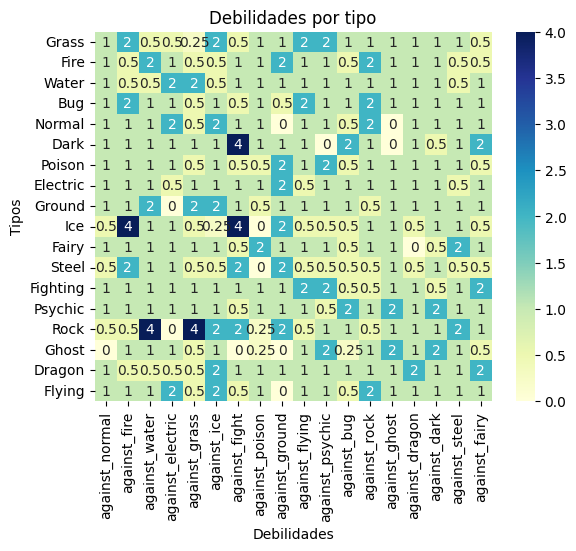

In [16]:
# Mapa de calor de cada tipo con sus debilidades

sns.heatmap(poke_weaks, annot=True, cmap="YlGnBu")

plt.xlabel('Debilidades')
plt.ylabel('Tipos')
plt.title("Debilidades por tipo")
plt.show()

# Promedio de total points por tipo de pokemon y otras stats


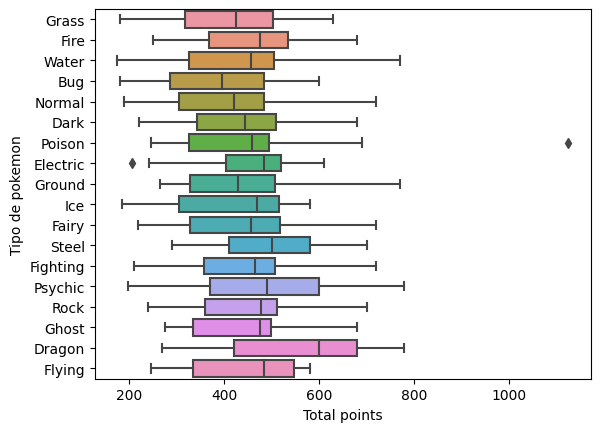

In [68]:
# Hacemos un Boxplot de total points(puse el tipo en el eje y xq sino no se entendia el nombre)

sns.boxplot(y= pokedex["type_1"], x= pokedex["total_points"])
plt.ylabel("Tipo de pokemon")
plt.xlabel("Total points")
plt.show()

In [85]:
# Quiero ver el outlier de mas de 1000 total points

pokedex["total_points"].idxmax()
pokedex.loc[pokedex['total_points'].idxmax()] # Eternatus Eternamax

pokedex_number                      890
name                Eternatus Eternamax
generation                            8
status                        Legendary
species                Gigantic Pokémon
type_number                           2
type_1                           Poison
type_2                           Dragon
height_m                          100.0
weight_kg                           NaN
abilities_number                      0
ability_1                           NaN
ability_2                           NaN
ability_hidden                      NaN
total_points                       1125
hp                                  255
attack                              115
defense                             250
sp_attack                           125
sp_defense                          250
speed                               130
catch_rate                          NaN
base_friendship                     NaN
base_experience                     NaN
growth_rate                        Slow


In [83]:
# Pensé que Arceus iba a tener mas total_points pero no es asi :o

pokedex.loc[pokedex['name'] == "Arceus"]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
590,493,Arceus,4,Mythical,Alpha Pokémon,1,Normal,NaN,3.2,320.0,1,Multitype,NaN,NaN,720,120,120,120,120,120,120,3.0,0.0,324.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [84]:
# Quiero ver el de menor total points

pokedex.loc[pokedex['total_points'].idxmin()] # Wishiwashi Solo Form

pokedex_number                       746
name                Wishiwashi Solo Form
generation                             7
status                            Normal
species                Small Fry Pokémon
type_number                            1
type_1                             Water
type_2                               NaN
height_m                             0.2
weight_kg                            0.3
abilities_number                       1
ability_1                      Schooling
ability_2                            NaN
ability_hidden                       NaN
total_points                         175
hp                                    45
attack                                20
defense                               20
sp_attack                             25
sp_defense                            25
speed                                 40
catch_rate                          60.0
base_friendship                     70.0
base_experience                     61.0
growth_rate     

# Preparación de Datos

In [17]:
pokedex = pokedex.drop(['Unnamed: 0', 'german_name', 'japanese_name'],axis=1)

In [18]:
pokedex.name

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3              Mega Venusaur
4                 Charmander
                ...         
1040               Glastrier
1041               Spectrier
1042                 Calyrex
1043       Calyrex Ice Rider
1044    Calyrex Shadow Rider
Name: name, Length: 1045, dtype: object

In [19]:
names = dict(zip(pokemon['#'], pokemon['Name']))
combats_names = combats[['First_pokemon', 'Second_pokemon', 'Winner']].replace(names)
combats_names.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [20]:
dic = {}
for col in pokedex:
  dic[col] = col + '_1'
pokedex_1 = pokedex.rename(columns = dic)
pokedex_1.columns

Index(['pokedex_number_1', 'name_1', 'generation_1', 'status_1', 'species_1',
       'type_number_1', 'type_1_1', 'type_2_1', 'height_m_1', 'weight_kg_1',
       'abilities_number_1', 'ability_1_1', 'ability_2_1', 'ability_hidden_1',
       'total_points_1', 'hp_1', 'attack_1', 'defense_1', 'sp_attack_1',
       'sp_defense_1', 'speed_1', 'catch_rate_1', 'base_friendship_1',
       'base_experience_1', 'growth_rate_1', 'egg_type_number_1',
       'egg_type_1_1', 'egg_type_2_1', 'percentage_male_1', 'egg_cycles_1',
       'against_normal_1', 'against_fire_1', 'against_water_1',
       'against_electric_1', 'against_grass_1', 'against_ice_1',
       'against_fight_1', 'against_poison_1', 'against_ground_1',
       'against_flying_1', 'against_psychic_1', 'against_bug_1',
       'against_rock_1', 'against_ghost_1', 'against_dragon_1',
       'against_dark_1', 'against_steel_1', 'against_fairy_1'],
      dtype='object')

In [21]:
pokedex_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number_1    1045 non-null   int64  
 1   name_1              1045 non-null   object 
 2   generation_1        1045 non-null   int64  
 3   status_1            1045 non-null   object 
 4   species_1           1045 non-null   object 
 5   type_number_1       1045 non-null   int64  
 6   type_1_1            1045 non-null   object 
 7   type_2_1            553 non-null    object 
 8   height_m_1          1045 non-null   float64
 9   weight_kg_1         1044 non-null   float64
 10  abilities_number_1  1045 non-null   int64  
 11  ability_1_1         1042 non-null   object 
 12  ability_2_1         516 non-null    object 
 13  ability_hidden_1    813 non-null    object 
 14  total_points_1      1045 non-null   int64  
 15  hp_1                1045 non-null   int64  
 16  attack

In [22]:
combats_names = combats_names.rename(columns = {'First_pokemon': 'name_1'})
combats_names.columns

Index(['name_1', 'Second_pokemon', 'Winner'], dtype='object')

In [23]:
df = pd.merge(combats_names, pokedex_1, on='name_1', how='left')

Lo mismo con el otro pokemon

In [24]:
dic = {}
for col in pokedex:
  dic[col] = col + '_2'
pokedex_2 = pokedex.rename(columns = dic)
pokedex_2.columns

Index(['pokedex_number_2', 'name_2', 'generation_2', 'status_2', 'species_2',
       'type_number_2', 'type_1_2', 'type_2_2', 'height_m_2', 'weight_kg_2',
       'abilities_number_2', 'ability_1_2', 'ability_2_2', 'ability_hidden_2',
       'total_points_2', 'hp_2', 'attack_2', 'defense_2', 'sp_attack_2',
       'sp_defense_2', 'speed_2', 'catch_rate_2', 'base_friendship_2',
       'base_experience_2', 'growth_rate_2', 'egg_type_number_2',
       'egg_type_1_2', 'egg_type_2_2', 'percentage_male_2', 'egg_cycles_2',
       'against_normal_2', 'against_fire_2', 'against_water_2',
       'against_electric_2', 'against_grass_2', 'against_ice_2',
       'against_fight_2', 'against_poison_2', 'against_ground_2',
       'against_flying_2', 'against_psychic_2', 'against_bug_2',
       'against_rock_2', 'against_ghost_2', 'against_dragon_2',
       'against_dark_2', 'against_steel_2', 'against_fairy_2'],
      dtype='object')

In [25]:
df = df.rename(columns = {'Second_pokemon': 'name_2'})
df.columns

Index(['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'species_1', 'type_number_1', 'type_1_1', 'type_2_1',
       'height_m_1', 'weight_kg_1', 'abilities_number_1', 'ability_1_1',
       'ability_2_1', 'ability_hidden_1', 'total_points_1', 'hp_1', 'attack_1',
       'defense_1', 'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'growth_rate_1',
       'egg_type_number_1', 'egg_type_1_1', 'egg_type_2_1',
       'percentage_male_1', 'egg_cycles_1', 'against_normal_1',
       'against_fire_1', 'against_water_1', 'against_electric_1',
       'against_grass_1', 'against_ice_1', 'against_fight_1',
       'against_poison_1', 'against_ground_1', 'against_flying_1',
       'against_psychic_1', 'against_bug_1', 'against_rock_1',
       'against_ghost_1', 'against_dragon_1', 'against_dark_1',
       'against_steel_1', 'against_fairy_1'],
      dtype='object')

In [26]:
df = pd.merge(df, pokedex_2, on='name_2', how='left')

In [27]:
df.columns

Index(['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'species_1', 'type_number_1', 'type_1_1', 'type_2_1',
       'height_m_1', 'weight_kg_1', 'abilities_number_1', 'ability_1_1',
       'ability_2_1', 'ability_hidden_1', 'total_points_1', 'hp_1', 'attack_1',
       'defense_1', 'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'growth_rate_1',
       'egg_type_number_1', 'egg_type_1_1', 'egg_type_2_1',
       'percentage_male_1', 'egg_cycles_1', 'against_normal_1',
       'against_fire_1', 'against_water_1', 'against_electric_1',
       'against_grass_1', 'against_ice_1', 'against_fight_1',
       'against_poison_1', 'against_ground_1', 'against_flying_1',
       'against_psychic_1', 'against_bug_1', 'against_rock_1',
       'against_ghost_1', 'against_dragon_1', 'against_dark_1',
       'against_steel_1', 'against_fairy_1', 'pokedex_number_2',
       'generation_2', 'status_2', 'species_2'

In [28]:
df.loc[(df.name_1 == "Charmander")]

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
108,Charmander,Lampent,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,608.0,5.0,Normal,Lamp Pokémon,2.0,Ghost,Fire,0.6,13.0,3.0,Flash Fire,Flame Body,Infiltrator,370.0,60.0,40.0,60.0,95.0,60.0,55.0,90.0,70.0,130.0,Medium Slow,1.0,Amorphous,NaN,50.0,20.0,0.0,0.00,2.0,1.0,0.50,0.5,0.00,0.5,2.0,1.0,1.00,0.25,2.0,2.0,1.0,2.0,0.5,0.5
1049,Charmander,Lickitung,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,108.0,1.0,Normal,Licking Pokémon,1.0,Normal,NaN,1.2,65.5,3.0,Own Tempo,Oblivious,Cloud Nine,385.0,90.0,55.0,75.0,60.0,75.0,30.0,45.0,70.0,77.0,Medium Fast,1.0,Monster,NaN,50.0,20.0,1.0,1.00,1.0,1.0,1.00,1.0,2.00,1.0,1.0,1.0,1.00,1.00,1.0,0.0,1.0,1.0,1.0,1.0
3136,Charmander,Metang,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,375.0,3.0,Normal,Iron Claw Pokémon,2.0,Steel,Psychic,1.2,202.5,2.0,Clear Body,NaN,Light Metal,420.0,60.0,75.0,100.0,55.0,80.0,50.0,3.0,35.0,147.0,Slow,1.0,Mineral,NaN,NaN,40.0,0.5,2.00,1.0,1.0,0.50,0.5,1.00,0.0,2.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
3687,Charmander,Abra,Abra,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,63.0,1.0,Normal,Psi Pokémon,1.0,Psychic,NaN,0.9,19.5,3.0,Synchronize,Inner Focus,Magic Guard,310.0,25.0,20.0,15.0,105.0,55.0,90.0,200.0,70.0,62.0,Medium Slow,1.0,Human-Like,NaN,75.0,20.0,1.0,1.00,1.0,1.0,1.00,1.0,0.50,1.0,1.0,1.0,0.50,2.00,1.0,2.0,1.0,2.0,1.0,1.0
5993,Charmander,Pidove,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,519.0,5.0,Normal,Tiny Pigeon Pokémon,2.0,Normal,Flying,0.3,2.1,3.0,Big Pecks,Super Luck,Rivalry,264.0,50.0,55.0,50.0,36.0,30.0,43.0,255.0,70.0,53.0,Medium Slow,1.0,Flying,NaN,50.0,15.0,1.0,1.00,1.0,2.0,0.50,2.0,1.00,1.0,0.0,1.0,1.00,0.50,2.0,

Revisar si hay valores NaN
 
 Los dropeamos ya que eran pokemons que estaban en el dataset de combates y no en la pokedex

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 97 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_1              50000 non-null  object 
 1   name_2              50000 non-null  object 
 2   Winner              50000 non-null  object 
 3   pokedex_number_1    49556 non-null  float64
 4   generation_1        49556 non-null  float64
 5   status_1            49556 non-null  object 
 6   species_1           49556 non-null  object 
 7   type_number_1       49556 non-null  float64
 8   type_1_1            49556 non-null  object 
 9   type_2_1            25663 non-null  object 
 10  height_m_1          49556 non-null  float64
 11  weight_kg_1         49556 non-null  float64
 12  abilities_number_1  49556 non-null  float64
 13  ability_1_1         49556 non-null  object 
 14  ability_2_1         25777 non-null  object 
 15  ability_hidden_1    40390 non-null  object 
 16  tota

In [30]:
cantidad_nan = (df['pokedex_number_1'].isna().sum(), df['pokedex_number_2'].isna().sum())

print("Cantidad de valores NaN:", cantidad_nan)

Cantidad de valores NaN: (444, 398)


hay pokemons en combats que no estan en pokedex ??? Problema resuelto

In [31]:
df.loc[df.pokedex_number_1.isna()].head(5)

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
74,Kyurem Black Kyurem,Nidoking,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,1.0,Normal,Drill Pokémon,2.0,Poison,Ground,1.4,62.0,3.0,Poison Point,Rivalry,Sheer Force,505.0,81.0,102.0,77.0,85.0,75.0,85.0,45.0,70.0,227.0,Medium Slow,2.0,Field,Monster,100.0,20.0,1.0,1.0,2.0,0.0,1.0,2.0,0.5,0.25,2.0,1.0,2.0,0.50,0.5,1.0,1.0,1.0,1.0,0.5
223,Basculin,Krabby,Basculin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,1.0,Normal,River Crab Pokémon,1.0,Water,NaN,0.4,6.5,3.0,Hyper Cutter,Shell Armor,Sheer Force,325.0,30.0,105.0,90.0,25.0,25.0,50.0,225.0,70.0,65.0,Medium Fast,1.0,Water 3,NaN,50.0,20.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
275,Zygarde Half Forme,Monferno,Zygarde Half Forme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391.0,4.0,Normal,Playful Pokémon,2.0,Fire,Fighting,0.9,22.0,2.0,Blaze,NaN,Iron Fist,405.0,64.0,78.0,52.0,78.0,52.0,81.0,45.0,70.0,142.0,Medium Slow,2.0,Field,Human-Like,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.00,2.0,2.0,2.0,0.25,1.0,1.0,1.0,0.5,0.5,1.0
663,Kyurem Black Kyurem,Machoke,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,1.0,Normal,Superpower Pokémon,1.0,Fighting,NaN,1.5,70.5,3.0,Guts,No Guard,Steadfast,405.0,80.0,100.0,70.0,50.0,60.0,45.0,90.0,70.0,142.0,Medium Slow,1.0,Human-Like,NaN,75.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.5,1.0,2.0
687,Kyurem Black Kyurem,Panpour,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.0,5.0,Normal,Spray Pokémon,1.0,Water,NaN,0.6,13.5,2.0,Gluttony,NaN,Torrent,316.0,50.0,53.0,48.0,53.0,48.0,64.0,190.0,70.0,63.0,Medium Fast,1.0,Field,NaN,87.5,20.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [32]:
pokedex.loc[pokedex.name == 'Zygarde Half Forme']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy


In [33]:
combats_names.loc[combats_names.name_1 == 'Zygarde Half Forme']

,name_1,Second_pokemon,Winner
275,Zygarde Half Forme,Monferno,Zygarde Half Forme
1181,Zygarde Half Forme,Cacturne,Zygarde Half Forme
1814,Zygarde Half Forme,Cinccino,Cinccino
2110,Zygarde Half Forme,Lickilicky,Zygarde Half Forme
2787,Zygarde Half Forme,Sneasel,Sneasel
3913,Zygarde Half Forme,Shedinja,Zygarde Half Forme
4305,Zygarde Half Forme,Primal Groudon,Zygarde Half Forme
4443,Zygarde Half Forme,Infernape,Infernape
5945,Zygarde Half Forme,Venomoth,Zygarde Half Forme
6506,Zygarde Half Forme,Weavile,Weavile


In [34]:
df = df.dropna(subset="pokedex_number_1")
df = df.dropna(subset="pokedex_number_2")

Cambiamos Winner por 0/1, donde 0 es el primer pokemon y 1 el segundo

In [35]:
df.Winner[df.Winner == df.name_1] = 0
df.Winner[df.Winner == df.name_2] = 1

<ipython-input-35-254939ddb546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Winner[df.Winner == df.name_2] = 1


In [36]:
df.type_number_2.unique()

array([2., 1.])

In [37]:
df.type_1_1.unique()

array(['Rock', 'Grass', 'Fairy', 'Fire', 'Bug', 'Psychic', 'Fighting',
       'Water', 'Normal', 'Ground', 'Electric', 'Dark', 'Ice', 'Steel',
       'Ghost', 'Dragon', 'Flying', 'Poison'], dtype=object)

Creamos una columna con el numero del segundo tipo del pokemon (0 si no tiene)

Ponemos en variable numerica el primer tipo del pokemon 


In [38]:
lista = ['Rock', 'Grass', 'Fairy', 'Fire', 'Bug', 'Psychic', 'Fighting',
       'Water', 'Normal', 'Ground', 'Electric', 'Dark', 'Ice', 'Steel',
       'Ghost', 'Dragon', 'Flying', 'Poison']

values = [n for n in range(1, len(lista)+1)]

dictionary = dict(zip(lista, values))

for l in lista:
  df.loc[df['type_1_1'] == l, 'type_number_1'] = dictionary[l] 
  df.loc[df['type_1_2'] == l, 'type_number_2'] = dictionary[l]
  df.loc[df['type_2_1'] == l, 'type_number_2_1'] = dictionary[l]
  df.loc[df['type_2_2'] == l, 'type_number_2_2'] = dictionary[l]



In [39]:
df.loc[df['type_number_2_2'].isna(), 'type_number_2_2'] = 0
df.loc[df['type_number_2_1'].isna(), 'type_number_2_1'] = 0

In [40]:
df.type_number_2.unique() 

array([ 2.,  1.,  6., 16.,  5., 14., 13., 15.,  8., 11., 12.,  4.,  9.,
       18.,  3.,  7., 10., 17.])

In [41]:
df.head()

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,Normal,Rock Skin Pokémon,1.0,Rock,Ground,0.6,72.0,2.0,Guts,NaN,Sand Veil,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,Slow,1.0,Monster,NaN,50.0,40.0,0.5,0.50,4.0,0.0,4.0,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,Normal,Wily Pokémon,2.0,Grass,Dark,1.0,28.0,3.0,Chlorophyll,Early Bird,Pickpocket,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,Medium Slow,2.0,Field,Grass,50.0,15.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,0.0,4.0,1.0,0.5,1.0,0.5,1.0,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,Sub Legendary,Grassland Pokémon,2.0,Grass,Fighting,2.0,200.0,1.0,Justified,NaN,NaN,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,Slow,1.0,Undiscovered,NaN,NaN,80.0,1.0,2.00,0.5,0.5,0.5,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,Sub Legendary,Cavern Pokémon,1.0,Rock,Fighting,1.9,260.0,1.0,Justified,NaN,NaN,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,Slow,1.0,Undiscovered,NaN,NaN,80.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.5,2.0,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,Normal,Happiness Pokémon,3.0,Fairy,Flying,0.6,3.2,3.0,Hustle,Serene Grace,Super Luck,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,Fast,2.0,Fairy,Flying,87.5,10.0,1.0,1.00,1.0,2.0,0.5,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,Normal,Cerebral Pokémon,6.0,Psychic,NaN,1.0,34.5,3.0,Telepathy,Synchronize,Analytic,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,Medium Fast,1.0,Human-Like,NaN,50.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,Normal,Lava Pokémon,4.0,Fire,NaN,0.7,35.0,3.0,Magma Armor,Flame Body,Weak Armor,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,Medium Fast,1.0,Amorphous,NaN,50.0,20.0,1.0,0.50,2.0,1.0,0.5,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,Normal,Cave Pokémon,16.0,Dragon,NaN,1.6,139.0,3.0,Rough Skin,Sheer Force,Mold Breaker,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,Medium Fast,2.0,Dragon,Monster,50.0,30.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,Normal,Spiral Pokémon,1.0,Rock,Water,1.0,35.0,3.0,Swift Swim,Shell Armor,Weak Armor,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,Medium Fast,2.0,Water 1,Water 3,87.5,30.0,0.5,0.25,1.0,2.0,4.0,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,Normal,Mold Pokémon,5.0,Bug,Rock,0.6,20.5,3.0,Sturdy,Gluttony,Contrary,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,Medium Slow,1.0,Bug,NaN,50.0,20.0,0.

In [42]:
df2 = df.drop(['species_1', 'ability_1_1', 'ability_2_1', 'ability_1_2', 'ability_2_2', 'species_2', 'ability_hidden_1', 'ability_hidden_2', 'growth_rate_1', 
               'growth_rate_2', 'egg_type_number_1',	'egg_type_1_1',	'egg_type_2_1',	'percentage_male_1',	'egg_cycles_1', 'egg_type_number_2',	'egg_type_1_2',	'egg_type_2_2',	'percentage_male_2',	'egg_cycles_2', 'type_1_1',	'type_2_1',
               'type_1_2',	'type_2_2'], axis=1)

In [43]:
df2

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,type_number_1,height_m_1,weight_kg_1,abilities_number_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,type_number_2,height_m_2,weight_kg_2,abilities_number_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,Normal,1.0,0.6,72.0,2.0,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,0.5,0.50,4.0,0.0,4.00,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,Normal,2.0,1.0,28.0,3.0,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.00,0.0,4.0,1.0,0.5,1.0,0.5,1.00,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,Sub Legendary,2.0,2.0,200.0,1.0,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,1.0,2.00,0.5,0.5,0.50,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,Sub Legendary,1.0,1.9,260.0,1.0,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.00,2.0,0.5,0.5,1.0,1.0,0.5,2.00,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,Normal,3.0,0.6,3.2,3.0,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,1.0,1.00,1.0,2.0,0.50,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,Normal,6.0,1.0,34.5,3.0,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.00,0.5,2.0,1.0,2.0,1.0,2.0,1.00,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,Normal,4.0,0.7,35.0,3.0,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,Normal,16.0,1.6,139.0,3.0,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.00,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,Normal,1.0,1.0,35.0,3.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,0.5,0.25,1.0,2.0,4.00,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,Normal,5.0,0.6,20.5,3.0,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.00,1.0,1.0,2.0,1.0,1.0,1.0,2.00,1.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Reshiram,Horsea,0,643.0,5.0,Legendary,16.0,3.2,330.0,1.0,680.0,100.0,120.0,100.0,150.0,120.0,90.0,3.0,0.0,306.0,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0,116.0,1.0,Normal,8.0,0.4,8.0,3.0,295.0,30.0,40.0,70.0,70.0,25.0,60.0,225.0,70.0,59.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,4.0,0.0
49996,Drilbur,Tynamo,0,529.0,5.0,Normal,10.0,0.3,8.5,3.0,328.0,60.0,85.0,40.0,30.0,45.0,68.0,120.0,70.0,66.0,1.0,1.00,2.0,0.0,2.00,2.0,1.00,0.50,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,1.0,602.0,5.0,Normal,11.0,0.2,0.3,1.0,275.0,35.0,55.0,40.0,45.0,40.0,60.0,190.0,70.0,55.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,0.50,1.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,0.0,0.0
49997,Pelipper,Zangoose,1,279.0,3.0,Normal,8.0,1.2,28.0,3.0,440.0,60.0,50.0,100.0,95.0,70.0,65.0,45.0,70.0,154.0,1.0,0.50,

In [44]:
df2.status_2.unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [45]:
lista = ['Normal', 'Sub Legendary', 'Legendary', 'Mythical']

values = [n for n in range(1, len(lista)+1)]

dictionary = dict(zip(lista, values))

for l in lista:
  df2.loc[df2['status_1'] == l, 'status_1'] = dictionary[l] 
  df2.loc[df2['status_2'] == l, 'status_2'] = dictionary[l]

In [46]:
df2.head()

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,type_number_1,height_m_1,weight_kg_1,abilities_number_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,type_number_2,height_m_2,weight_kg_2,abilities_number_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,1,1.0,0.6,72.0,2.0,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,0.5,0.50,4.0,0.0,4.0,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,1,2.0,1.0,28.0,3.0,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,0.0,4.0,1.0,0.5,1.0,0.5,1.0,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,2,2.0,2.0,200.0,1.0,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,1.0,2.00,0.5,0.5,0.5,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,2,1.0,1.9,260.0,1.0,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.5,2.0,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,1,3.0,0.6,3.2,3.0,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,1.0,1.00,1.0,2.0,0.5,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,1,6.0,1.0,34.5,3.0,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,1,4.0,0.7,35.0,3.0,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,1.0,0.50,2.0,1.0,0.5,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,1,16.0,1.6,139.0,3.0,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,1,1.0,1.0,35.0,3.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,0.5,0.25,1.0,2.0,4.0,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,1,5.0,0.6,20.5,3.0,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,1.0


# Modelo

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
X = df2.drop(['name_1', 'name_2', 'Winner'], axis = 1).to_numpy()
y = df2['Winner'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34412, 72) (14749, 72) (34412,) (14749,)


In [49]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [50]:
log = LogisticRegression(penalty='l1',solver='liblinear')
log.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [51]:
pred = log.predict(X_test)

In [52]:
accuracy_score(y_test, pred)

0.88060207471693

Hay que mejorar eso!